## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('KaggleV2-May-2016.csv')# reading the dataframe into a pandas dataset
df['No-show'].value_counts('No') #counting the proportion of No to yes-showing imablance of class in the target variable

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

In [3]:
df.groupby('Neighbourhood')['No-show'].value_counts('No') 

Neighbourhood    No-show
AEROPORTO        No         0.875000
                 Yes        0.125000
ANDORINHAS       No         0.769673
                 Yes        0.230327
ANTÔNIO HONÓRIO  No         0.815498
                              ...   
TABUAZEIRO       Yes        0.182950
UNIVERSITÁRIO    No         0.789474
                 Yes        0.210526
VILA RUBIM       No         0.834313
                 Yes        0.165687
Name: proportion, Length: 160, dtype: float64

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
pd.to_datetime(df['AppointmentDay']).dt.time.value_counts()
#so appointment time has no signficance..its just satandardized not exactly recorded

AppointmentDay
00:00:00    110527
Name: count, dtype: int64

In [9]:
print(df[['ScheduledDay', 'AppointmentDay']].head(1000))

             ScheduledDay        AppointmentDay
0    2016-04-29T18:38:08Z  2016-04-29T00:00:00Z
1    2016-04-29T16:08:27Z  2016-04-29T00:00:00Z
2    2016-04-29T16:19:04Z  2016-04-29T00:00:00Z
3    2016-04-29T17:29:31Z  2016-04-29T00:00:00Z
4    2016-04-29T16:07:23Z  2016-04-29T00:00:00Z
..                    ...                   ...
995  2016-04-15T14:36:26Z  2016-04-29T00:00:00Z
996  2016-04-28T20:20:09Z  2016-04-29T00:00:00Z
997  2016-04-18T12:16:42Z  2016-04-29T00:00:00Z
998  2016-04-15T16:40:32Z  2016-04-29T00:00:00Z
999  2016-04-15T16:13:03Z  2016-04-29T00:00:00Z

[1000 rows x 2 columns]


In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) #feature Engineering

df['SchedulingHour'] = df['ScheduledDay'].dt.hour

df['hour_sin'] = np.sin(2 * np.pi * df['SchedulingHour'] / 24) #extracting scheduling hour and creating sine and cosine cycles out of it-new features from an existing feature

df['hour_cos'] = np.cos(2 * np.pi * df['SchedulingHour'] / 24)

df['ScheduledDay'] = df['ScheduledDay'].dt.date

df['AppointmentDay'] = df['AppointmentDay'].dt.date

df['Delay'] = (df['AppointmentDay'] - df['ScheduledDay']).apply(lambda x:x.days) #calculating delay in number of days

df = df.drop(['ScheduledDay', 'SchedulingHour', 'AppointmentDay', 'AppointmentID'], axis=1) #keeping the new features-removing the old ones

print(df.head())

      PatientId Gender  Age      Neighbourhood  Scholarship  Hipertension  \
0  2.987250e+13      F   62    JARDIM DA PENHA            0             1   
1  5.589978e+14      M   56    JARDIM DA PENHA            0             0   
2  4.262962e+12      F   62      MATA DA PRAIA            0             0   
3  8.679512e+11      F    8  PONTAL DE CAMBURI            0             0   
4  8.841186e+12      F   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  hour_sin  \
0         0           0        0             0      No -1.000000   
1         0           0        0             0      No -0.866025   
2         0           0        0             0      No -0.866025   
3         0           0        0             0      No -0.965926   
4         1           0        0             0      No -0.866025   

       hour_cos  Delay  
0 -1.836970e-16      0  
1 -5.000000e-01      0  
2 -5.000000e-01      0  
3 -2.588190e-01      0  
4 -

In [13]:
df=pd.get_dummies(df,columns=['Gender','Neighbourhood'],dtype=int) #generating one hot encoding for these variables
df.head()
for col in df.columns:
    if col.startswith('Gender'):
        print(col)
df=df.drop(['Gender_M'],axis=1) #finally keeping one column for gender-sufficient enough
print(df.head())

Gender_F
Gender_M
      PatientId  Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
0  2.987250e+13   62            0             1         0           0   
1  5.589978e+14   56            0             0         0           0   
2  4.262962e+12   62            0             0         0           0   
3  8.679512e+11    8            0             0         0           0   
4  8.841186e+12   56            0             1         1           0   

   Handcap  SMS_received No-show  hour_sin  ...  Neighbourhood_SANTOS REIS  \
0        0             0      No -1.000000  ...                          0   
1        0             0      No -0.866025  ...                          0   
2        0             0      No -0.866025  ...                          0   
3        0             0      No -0.965926  ...                          0   
4        0             0      No -0.866025  ...                          0   

   Neighbourhood_SEGURANÇA DO LAR  Neighbourhood_SOLON BORGES  \
0        

In [15]:
import numpy as np
val_min = df['Age'].min()
val_max = df['Age'].max() #Min-max scaling for age 

def min_max_scaling(x):
    if(val_max-val_min!=0):
            return (x - val_min) / (val_max - val_min)
    return 0

df['Age'] = df['Age'].apply(min_max_scaling)

df.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,hour_sin,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,0.543103,0,1,0,0,0,0,No,-1.000000,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,0.491379,0,0,0,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,0.543103,0,0,0,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,0.077586,0,0,0,0,0,0,No,-0.965926,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,0.491379,0,1,1,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,hour_sin,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,2.987250e+13,0.543103,0,1,0,0,0,0,No,-1.000000,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,0.491379,0,0,0,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,0.543103,0,0,0,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,0.077586,0,0,0,0,0,0,No,-0.965926,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,0.491379,0,1,1,0,0,0,No,-0.866025,...,0,0,0,0,0,0,0,0,0,0


In [19]:

h=df['No-show']
df=df.drop(['No-show'],axis=1) #converting yes and nos to 1s and 0s
df['No-show']=h
def categorize_show(x):
    if x=='No':
        return 0
    else:
        return 1
df['No-show']=df['No-show'].apply(categorize_show)
df.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,hour_sin,hour_cos,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,No-show
0,2.987250e+13,0.543103,0,1,0,0,0,0,-1.000000,-1.836970e-16,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,0.491379,0,0,0,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,0.543103,0,0,0,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,0.077586,0,0,0,0,0,0,-0.965926,-2.588190e-01,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,0.491379,0,1,1,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df['Delay'].head(110527)
df['Delay'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Delay, dtype: float64

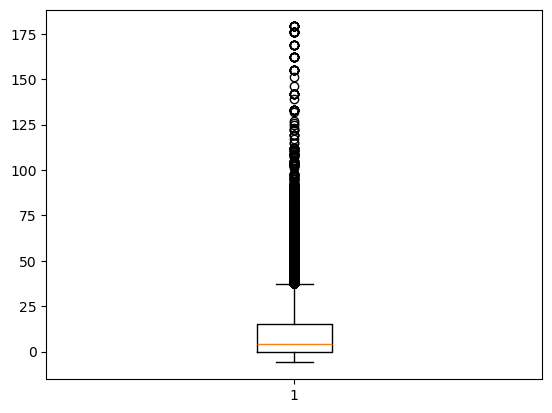

In [23]:
import matplotlib.pyplot as plt
plt.boxplot(df['Delay']) #visualizing the density distribution across different delay intervals
plt.show()

In [24]:
def remove_neg(x):
    if(pd.isnull(x)):
        return 0
    return max(0, x)

df['Delay'] = df['Delay'].apply(remove_neg)

val_min = df['Delay'].min()
val_max = df['Delay'].max()

def min_max_scaling(x):
    if(val_max-val_min!=0):
            return (x - val_min) / (val_max - val_min)
    return 0

df['Delay'] = df['Delay'].apply(min_max_scaling) #min max scaling of delay time

df.head()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,hour_sin,hour_cos,...,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,No-show
0,2.987250e+13,0.543103,0,1,0,0,0,0,-1.000000,-1.836970e-16,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,0.491379,0,0,0,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,0.543103,0,0,0,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,0.077586,0,0,0,0,0,0,-0.965926,-2.588190e-01,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,0.491379,0,1,1,0,0,0,-0.866025,-5.000000e-01,...,0,0,0,0,0,0,0,0,0,0


In [27]:
target_encoded_patientid=df.groupby('PatientId')['No-show'].mean() #target encoding of patient id

df['PatientID_encoded']=df['PatientId'].map(target_encoded_patientid) #target encoding done on the basis of the mean of target variable for each patient

df['PatientID_encoded']=df['PatientID_encoded'].fillna(df['No-show'].mean()) #filling na values with mean across the whole dataset

temp_df=df['No-show']

df=df.drop(['PatientId','No-show'],axis=1)

df['No-show']=temp_df

df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,hour_sin,hour_cos,Delay,...,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,PatientID_encoded,No-show
0,0.543103,0,1,0,0,0,0,-1.000000,-1.836970e-16,0.0,...,0,0,0,0,0,0,0,0,0.0,0
1,0.491379,0,0,0,0,0,0,-0.866025,-5.000000e-01,0.0,...,0,0,0,0,0,0,0,0,0.0,0
2,0.543103,0,0,0,0,0,0,-0.866025,-5.000000e-01,0.0,...,0,0,0,0,0,0,0,0,0.0,0
3,0.077586,0,0,0,0,0,0,-0.965926,-2.588190e-01,0.0,...,0,0,0,0,0,0,0,0,0.5,0
4,0.491379,0,1,1,0,0,0,-0.866025,-5.000000e-01,0.0,...,0,0,0,0,0,0,0,0,0.0,0


## NN training

#### Approach 1-Pure python implementation using only pandas and numpy

In [30]:
#4 hidden layers
import numpy as np
class HiddenLayer: #hidden layer class definition
    def __init__(self,num_o,num_i):
        self.num_i=num_i
        self.num_o=num_o
        self.weight_matrix=np.random.randn(self.num_o,self.num_i)*np.sqrt((2.0/num_i)) #weight matrix initialized using He initialization
        self.bias_vector=np.zeros((self.num_o,)) # bias values intialized to 0
        
    def activation_func_ReLu(self,values):
        values=np.maximum(0,values) #activation ReLu
        return values
    def activation_func_sigmoid(self,values):
        values=1/(1+np.exp(-1*values)) #activation sigmoid
        return values

In [32]:
import numpy as np
class OutputLayer:
    def __init__(self,num_o,num_i):
        self.num_i=num_i
        self.num_o=num_o #output layer definition
        self.weight_matrix=np.random.randn(self.num_o,self.num_i)*np.sqrt((2.0/num_i)) #he initilaization of weights
        self.bias_scalar=0 #bias (scalar in this case)-initialized to 0
        
    def activation_func_sigmoid(self,values):
        values=1/(1+np.exp(-1*values)) #activation sigmoid
        return values

In [34]:
val=0.8*df.shape[0]
print(val)

88421.6


In [36]:
##using batch training and then testing the model on unseen data

df=df.sample(frac=1).reset_index(drop=True) #randomizing distribution

feature_input_mat=df.iloc[:88422,:df.shape[1]-1]

alpha_lr=0.03

eps=1e-15

epochs=686

w0=0.25

w1=0.75

f1_score_m=[] #to store f1 score across epochs

recall_m=[] #to store recall across epochs

precision_m=[] #to store precision across epochs

loss_m=[] #to store loss across epochs

y_actual=df.iloc[:88422,df.shape[1]-1:]

hidden_layer_1=HiddenLayer(256,df.shape[1]-1)

hidden_layer_2=HiddenLayer(128,256) #hidden layer parametrized instantiation

hidden_layer_3=HiddenLayer(64,128)

hidden_layer_4=HiddenLayer(32,64)

output_layer=OutputLayer(1,32) #output layer parameterized instantiation

X_train=feature_input_mat.values
        
y_train=y_train = df.iloc[:88422, df.shape[1]-1:].values ## for batch gradient descent

for i in range(epochs):
    
        #for specifically the input layer

        a1=X_train@(hidden_layer_1.weight_matrix).T+hidden_layer_1.bias_vector
        
        h1=hidden_layer_1.activation_func_ReLu(a1)

        ##forward propagation
        
        a2=h1@(hidden_layer_2.weight_matrix).T+hidden_layer_2.bias_vector
        
        h2=hidden_layer_2.activation_func_ReLu(a2)
        
        a3=h2@(hidden_layer_3.weight_matrix).T+hidden_layer_3.bias_vector
        
        h3=hidden_layer_3.activation_func_ReLu(a3)
        
        a4=h3@(hidden_layer_4.weight_matrix).T+hidden_layer_4.bias_vector
        
        h4=hidden_layer_4.activation_func_ReLu(a4)

        ##for specifically the output layer
        ao=h4@(output_layer.weight_matrix).T+output_layer.bias_scalar
        
        y_hat_clipped=output_layer.activation_func_sigmoid(ao)

        y_hat_clipped=np.clip(y_hat_clipped, eps, 1 - eps)

        cross_entropy_loss = -np.mean(w1 * y_train * np.log2(y_hat_clipped) + w0 * (1 - y_train) * np.log2(1 - y_hat_clipped))

        y_pred_train = (y_hat_clipped >= 0.5).astype(int)

        y_true_train = y_train.flatten()
        y_pred_train = y_pred_train.flatten()

        TP = np.sum((y_true_train == 1) & (y_pred_train == 1)) #true positives
        TN = np.sum((y_true_train == 0) & (y_pred_train == 0)) #true negatives
        FP = np.sum((y_true_train == 0) & (y_pred_train == 1)) #false positives
        FN = np.sum((y_true_train == 1) & (y_pred_train == 0)) #false negatives

        # Compute metrics
        precision = TP / (TP + FP + 1e-15)
        recall = TP / (TP + FN + 1e-15)
        f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)


        f1_score_m.append(f1_score)

        recall_m.append(recall)

        precision_m.append(precision)

        loss_m.append(cross_entropy_loss)

        ##now backward propagation
        ##first for the output layer

        dl_dy=(-1*w1*(y_train/y_hat_clipped)+w0*(1-y_train)/(1-y_hat_clipped))/(y_train.shape[0])

        dy_dz=y_hat_clipped*(1-y_hat_clipped)

        delta_output = dl_dy * dy_dz 

        dz_dw=((dl_dy)*(dy_dz)).T@h4

        wo_grad=dz_dw

        bo_grad=np.sum(((dl_dy)*(dy_dz)))

        ##now for the hidden layers
        
        dz_dh4 = output_layer.weight_matrix  # shape: (1, 32)
        
        da4 = a4  # we need this from forward pass
        
        relu_grad4 = (da4 > 0).astype(float)  # shape: (batch_size, 32)

        delta_4 = (delta_output @ dz_dh4) #relu_grad4  # shape: (batch_size, 32)

        w4_grad = delta_4.T @ h3  # shape: (32, 64)
        
        b4_grad = np.sum(delta_4, axis=0)  # shape: (32,)
        ##
        ##hidden layer three
        dz_dh3 = hidden_layer_4.weight_matrix  # shape: (32, 64)

        relu_grad3 = (a3 > 0).astype(float)  # shape: (batch_size, 64)

        delta_3 = (delta_4 @ dz_dh3) * relu_grad3  # shape: (batch_size, 64)

        w3_grad = delta_3.T @ h2  # shape: (64, 128)
        b3_grad = np.sum(delta_3, axis=0)  # shape: (64,)


        ##
        dz_dh2 = hidden_layer_3.weight_matrix
        relu_grad2 = (a2 > 0).astype(float)

        delta_2 = (delta_3 @ dz_dh2) * relu_grad2

        w2_grad = delta_2.T @ h1
        b2_grad = np.sum(delta_2, axis=0)

        ##
        dz_dh1 = hidden_layer_2.weight_matrix
        relu_grad1 = (a1 > 0).astype(float)

        delta_1 = (delta_2 @ dz_dh1) * relu_grad1

        w1_grad = delta_1.T @ X_train
        b1_grad = np.sum(delta_1, axis=0)

        ##
        # Output layer
        output_layer.weight_matrix -= alpha_lr * wo_grad
        output_layer.bias_scalar -= alpha_lr * bo_grad

        # Hidden layer 4
        hidden_layer_4.weight_matrix -= alpha_lr * w4_grad
        hidden_layer_4.bias_vector -= alpha_lr * b4_grad

        # Hidden layer 3
        hidden_layer_3.weight_matrix -= alpha_lr * w3_grad
        hidden_layer_3.bias_vector -= alpha_lr * b3_grad

        # Hidden layer 2
        hidden_layer_2.weight_matrix -= alpha_lr * w2_grad
        hidden_layer_2.bias_vector -= alpha_lr * b2_grad

        # Hidden layer 1
        hidden_layer_1.weight_matrix -= alpha_lr * w1_grad
        hidden_layer_1.bias_vector -= alpha_lr * b1_grad

        ##

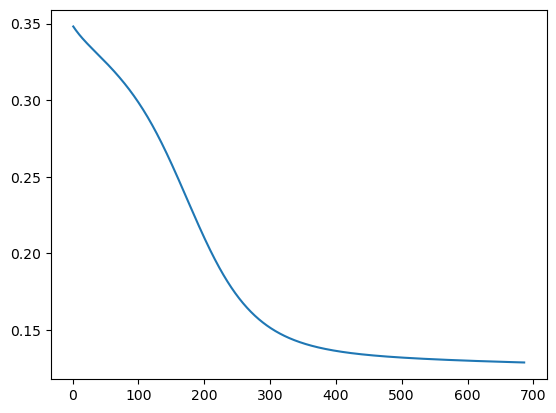

In [38]:
epochs=[]
for i in range(1,687):
    epochs.append(i)
plt.plot(epochs,loss_m) #plotting epochs vs loss
plt.show()

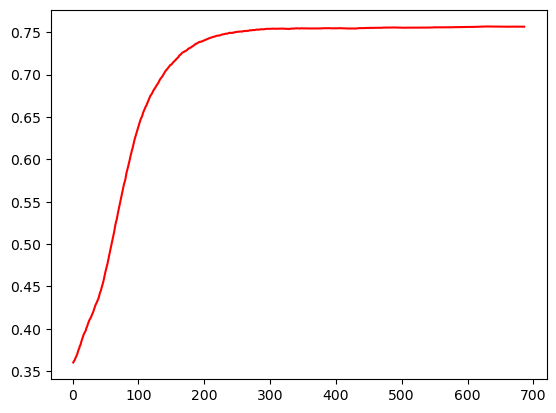

In [40]:
plt.plot(epochs,f1_score_m,color='r')
plt.show() #plotting f1 score vs epochs

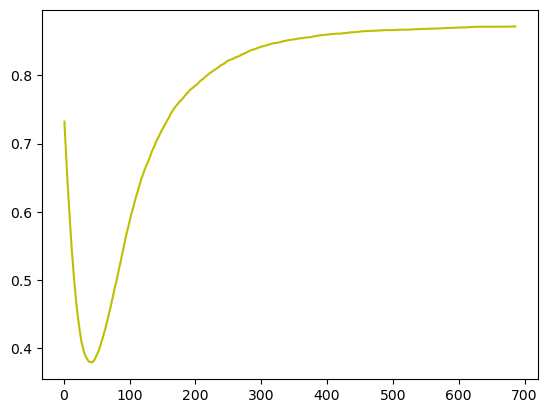

In [42]:
plt.plot(epochs,recall_m,color='y')
plt.show() #plotting recall vs epochs

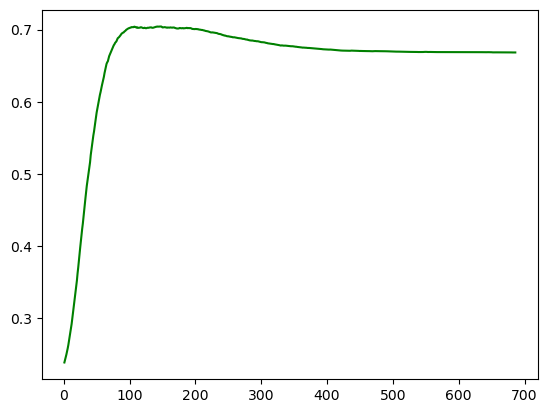

In [44]:
plt.plot(epochs,precision_m,color='g')
plt.show() #plotting precision vs epochs

In [50]:
def compute_pr_auc(precisions, recalls):
    # Sort by recall
    recall, precision = zip(*sorted(zip(recall_m, precision_m)))
    auc = 0.0
    for i in range(1, len(recall)):
        auc += (recall[i] - recall[i - 1]) * precision[i]
    return auc

pr_auc = compute_pr_auc(precision_m, recall_m)
print(f"PR AUC: {pr_auc:.4f}") #calculating pr auc

PR AUC: 0.3179


In [94]:
##testing on test data
# Prepare test data
X_test = df.iloc[88422:, :df.shape[1]-1].values
y_test = df.iloc[88422:, df.shape[1]-1:].values

# Forward pass on unseen/test data
a1_test = X_test @ hidden_layer_1.weight_matrix.T + hidden_layer_1.bias_vector
h1_test = hidden_layer_1.activation_func_ReLu(a1_test)

a2_test = h1_test @ hidden_layer_2.weight_matrix.T + hidden_layer_2.bias_vector
h2_test = hidden_layer_2.activation_func_ReLu(a2_test)

a3_test = h2_test @ hidden_layer_3.weight_matrix.T + hidden_layer_3.bias_vector
h3_test = hidden_layer_3.activation_func_ReLu(a3_test)

a4_test = h3_test @ hidden_layer_4.weight_matrix.T + hidden_layer_4.bias_vector
h4_test = hidden_layer_4.activation_func_ReLu(a4_test)

ao_test = h4_test @ output_layer.weight_matrix.T + output_layer.bias_scalar
y_pred_test = output_layer.activation_func_sigmoid(ao_test)

# Clip to avoid log(0) issues
y_pred_test_clipped = np.clip(y_pred_test, eps, 1 - eps)

test_loss = -np.mean(w1 * y_test * np.log2(y_pred_test_clipped) + w0 * (1 - y_test) * np.log2(1 - y_pred_test_clipped))
print("Test Loss:", test_loss)

# Step 1: Convert predicted probabilities to binary predictions (threshold = 0.5)
y_pred_binary = (y_pred_test >= 0.5).astype(int)

# Flatten both arrays for easier element-wise comparison
y_true = y_test.flatten()
y_pred = y_pred_binary.flatten()

# Step 2: Count TP, TN, FP, FN
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# Step 3: Compute Metrics
precision = TP / (TP + FP + 1e-15)   # avoid division by 0
recall = TP / (TP + FN + 1e-15)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)

# Step 4: Print Results
print(f"Test Loss: {test_loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Test Loss: 0.13087190988381497
Test Loss: 0.1309
Precision: 0.6709
Recall: 0.8601
F1 Score: 0.7538


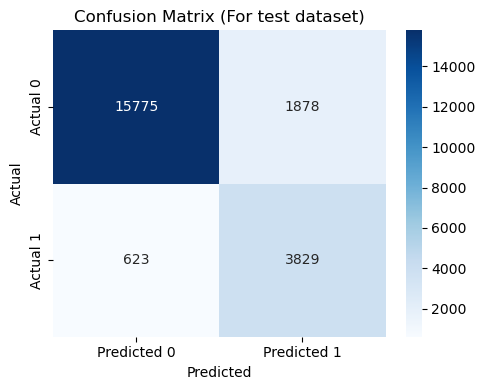

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix values
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix (For test dataset)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

## NN Training

### Using PyTorch

In [60]:
import torch

In [61]:
from sklearn.model_selection import train_test_split #using sklearn
X=df.iloc[:,:df.shape[1]-1]
y=df.iloc[:,df.shape[1]-1:]
X=X.values
y=y.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #splitting into test and train data 20% test and 80%train
X_train=torch.FloatTensor(X_train)
y_train=torch.FloatTensor(y_train)
X_test=torch.FloatTensor(X_test)
y_test=torch.FloatTensor(y_test)

In [62]:
import torch.nn as nn #imprting torch modules
import torch.nn.functional as F

In [66]:
class Model(nn.Module): #creating a class to represent the model
    def __init__(self,in_features=df.shape[1]-1,h1=256,h2=128,h3=64,h4=32,output_features=1):
        super().__init__()
        self.fc1=nn.Linear(in_features,h1) #fully connected layer 1
        self.fc2=nn.Linear(h1,h2) #fully connected layer 2
        self.fc3=nn.Linear(h2,h3) #fully connected layer 3
        self.fc4=nn.Linear(h3,h4) #fully connected layer 4
        self.out=nn.Linear(h4,output_features) #output layer
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x)) #relu for all hidden layers
        x=F.relu(self.fc4(x))
        x = torch.sigmoid(self.out(x)) #sigmoid for output

        return x



In [68]:
torch.manual_seed(42) #to create consistency across randomizations
model=Model() #creating an instance of the model


In [70]:
def weighted_cross_loss(y_pred,y_real):
    eps=1e-7
    w1=0.75
    w0=0.25
    y_pred_clipped = torch.clamp(y_pred, eps, 1 - eps)
    loss = -torch.mean(w1 * y_real * torch.log2(y_pred_clipped) +
                       w0 * (1 - y_real) * torch.log2(1 - y_pred_clipped))
    return loss

optimizer=torch.optim.Adam(model.parameters(),lr=0.0003)

epochs=1000
losses=[]
f1_score_m2=[]
recall_m2=[]
precision_m2=[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = weighted_cross_loss(y_pred, y_train)
    # Store values
    losses.append(loss.item())
    y_pred_binary = (y_pred >= 0.5).int()

# Flatten both arrays for easier element-wise comparison
    y_true = y_train.flatten().int()
    y_pred = y_pred_binary.flatten().int()

# Step 2: Count TP, TN, FP, FN
    TP = torch.sum((y_true == 1) & (y_pred == 1))
    TN = torch.sum((y_true == 0) & (y_pred == 0))
    FP = torch.sum((y_true == 0) & (y_pred == 1))
    FN = torch.sum((y_true == 1) & (y_pred == 0))

# Step 3: Compute Metrics
    precision = TP / (TP + FP + 1e-15)   # avoid division by 0
    recall = TP / (TP + FN + 1e-15)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)

    f1_score_m2.append(f1_score)
    recall_m2.append(recall)
    precision_m2.append(precision)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Debug print every 100 epochs
    if i % 5 == 0 or i == epochs - 1:
        print(f"Epoch {i}:Loss={loss.item():.4f}")


Epoch 0:Loss=0.3468
Epoch 5:Loss=0.3457
Epoch 10:Loss=0.3442
Epoch 15:Loss=0.3423
Epoch 20:Loss=0.3395
Epoch 25:Loss=0.3355
Epoch 30:Loss=0.3301
Epoch 35:Loss=0.3233
Epoch 40:Loss=0.3144
Epoch 45:Loss=0.3033
Epoch 50:Loss=0.2891
Epoch 55:Loss=0.2700
Epoch 60:Loss=0.2466
Epoch 65:Loss=0.2201
Epoch 70:Loss=0.1928
Epoch 75:Loss=0.1680
Epoch 80:Loss=0.1485
Epoch 85:Loss=0.1362
Epoch 90:Loss=0.1301
Epoch 95:Loss=0.1278
Epoch 100:Loss=0.1268
Epoch 105:Loss=0.1259
Epoch 110:Loss=0.1252
Epoch 115:Loss=0.1245
Epoch 120:Loss=0.1237
Epoch 125:Loss=0.1231
Epoch 130:Loss=0.1224
Epoch 135:Loss=0.1217
Epoch 140:Loss=0.1212
Epoch 145:Loss=0.1207
Epoch 150:Loss=0.1204
Epoch 155:Loss=0.1200
Epoch 160:Loss=0.1197
Epoch 165:Loss=0.1193
Epoch 170:Loss=0.1188
Epoch 175:Loss=0.1184
Epoch 180:Loss=0.1181
Epoch 185:Loss=0.1178
Epoch 190:Loss=0.1175
Epoch 195:Loss=0.1172
Epoch 200:Loss=0.1169
Epoch 205:Loss=0.1166
Epoch 210:Loss=0.1163
Epoch 215:Loss=0.1161
Epoch 220:Loss=0.1158
Epoch 225:Loss=0.1155
Epoch 230:

In [74]:
print(f"Final f1-score on training dataset: {f1_score_m2[epochs-1]:.4f}")
print(f"Final recall on training dataset: {recall_m2[epochs-1]:.4f}") #final f1 score at the end of all epochs
print(f"Final precision on training dataset: {precision_m2[epochs-1]:.4f}")

Final f1-score on training dataset: 0.7985
Final recall on training dataset: 0.9445
Final precision on training dataset: 0.6917


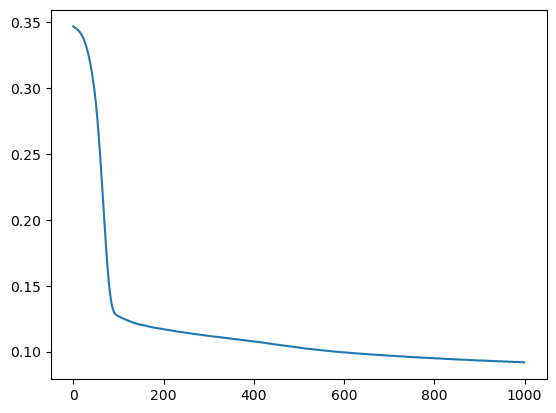

In [76]:
plt.plot(range(epochs),losses) #loss vs epochs
plt.show()

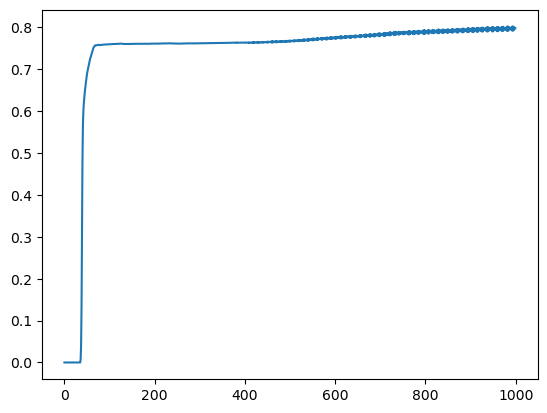

In [78]:
plt.plot(range(epochs),f1_score_m2) #f1 score vs epochs
plt.show()

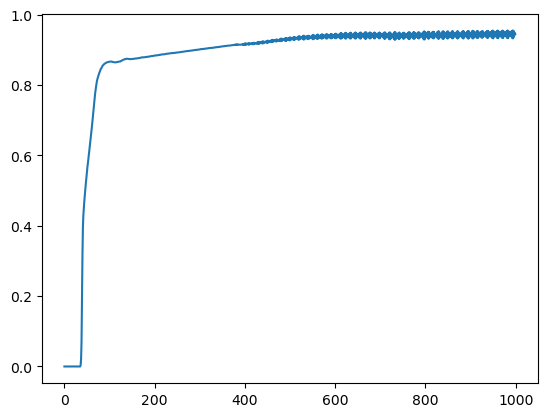

In [80]:
plt.plot(range(epochs),recall_m2) #recall vs epochs
plt.show()

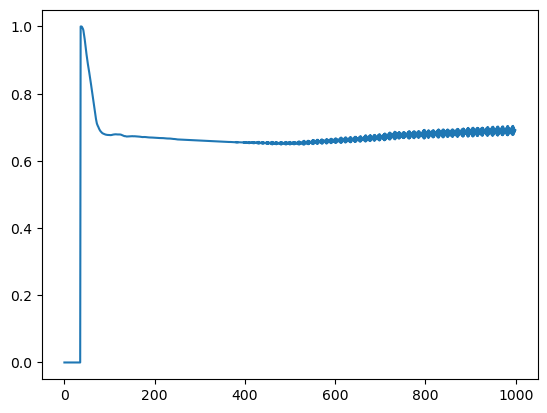

In [82]:
plt.plot(range(epochs),precision_m2) #precision vs epochs
plt.show()

In [84]:
def compute_pr_auc(precisions, recalls):
    # Sort by recall
    recall, precision = zip(*sorted(zip(recall_m2, precision_m2)))
    auc = 0.0
    for i in range(1, len(recall)):
        auc += (recall[i] - recall[i - 1]) * precision[i]
    return auc

pr_auc = compute_pr_auc(precision_m2, recall_m2)
print(f"PR AUC: {pr_auc:.4f}") #calculating pr auc

PR AUC: 0.8498


In [86]:
with torch.no_grad():
    y_eval=model.forward(X_test)
    loss=weighted_cross_loss(y_eval,y_test)
    y_pred_binary = (y_eval >= 0.5).int()

# Flatten both arrays for easier element-wise comparison
    y_true = y_test.flatten().int()
    y_pred = y_pred_binary.flatten().int()

# Step 2: Count TP, TN, FP, FN
    TP = torch.sum((y_true == 1) & (y_pred == 1))
    TN = torch.sum((y_true == 0) & (y_pred == 0))
    FP = torch.sum((y_true == 0) & (y_pred == 1))
    FN = torch.sum((y_true == 1) & (y_pred == 0))

# Step 3: Compute Metrics
    precision = TP / (TP + FP + 1e-15)   # avoid division by 0
    recall = TP / (TP + FN + 1e-15)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-15)

# Step 4: Print Results
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

Test Loss: 0.1309
Precision: 0.6573
Recall: 0.8795
F1 Score: 0.7523


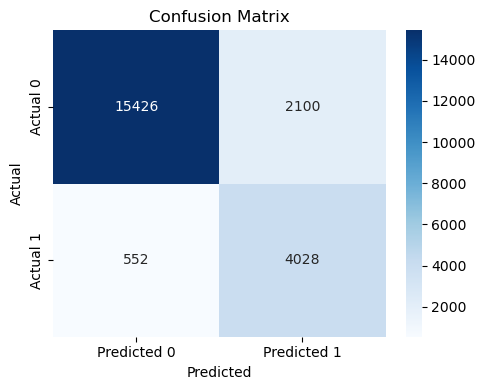

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PyTorch tensors to NumPy arrays
y_true = y_true.numpy() if hasattr(y_true, "numpy") else np.array(y_true)
y_pred = y_pred.numpy() if hasattr(y_pred, "numpy") else np.array(y_pred)

# Calculate confusion matrix values
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

# Create and plot confusion matrix
conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()
